In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
data = pd.read_csv('DatasetResumidoPruebas.csv')
data.drop(['iso_code','location','date'], axis = 1, inplace = True)


data = data.interpolate(method='linear')
data.head()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,population,continent
0,229263.0,7965.0,5574.273,193.660,54.422,18.6,1803.987,0.50,41128772,Asia
1,334090.0,3604.0,117541.387,1267.979,104.871,38.0,11803.431,2.89,2842318,Europe
2,271997.0,6881.0,6057.404,153.241,17.348,29.1,13913.839,1.90,44903228,Africa
3,48015.0,159.0,601367.684,1991.408,163.755,43.3,42137.330,2.50,79843,Europe
4,106002.0,1936.0,2978.505,54.399,23.890,16.8,5819.495,0.64,35588996,Africa


# Sección nueva

In [57]:
#normalizamos los datos
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, 1:-2], dtype = float))

#hacemos un pca
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

#creamos un dataframe con los datos reducidos y su respectiva clase
principal_df = pd.DataFrame(data = X, columns = ['Componente 1', 'Componente 2'])
principal_df['target'] = y


#graficamos los datos con plotly
fig = px.scatter(principal_df, x = 'Componente 1', y = 'Componente 2', color = 'target')
fig.show()

<Axes: >

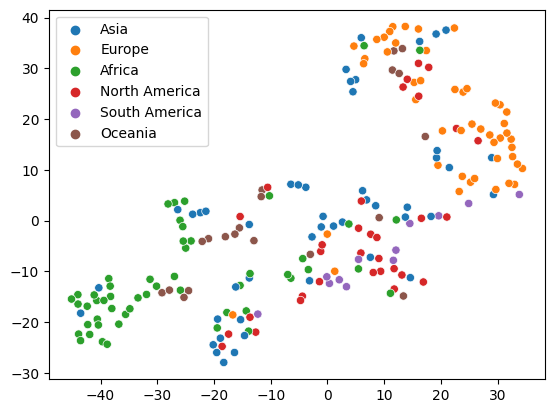

In [58]:
import seaborn as sns
#normalizamos los datos
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, 1:-2], dtype = float))

X_embedded = TSNE(n_components=2, learning_rate='auto',
                    init='random', perplexity=10).fit_transform(X)



sns.scatterplot(x=X_embedded[:, 0],y=X_embedded[:, 1],hue=y)

In [59]:
data = pd.read_csv('DatasetResumidoPruebas.csv')
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-59-408d225108cd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-59-408d225108cd>:4: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,population
total_cases,1.00,0.76,0.12,0.14,-0.02,0.29,0.19,0.21,0.70
total_deaths,0.76,1.00,0.03,0.28,-0.04,0.19,0.13,0.06,0.46
total_cases_per_million,0.12,0.03,1.00,0.47,0.17,0.76,0.65,0.47,-0.12
total_deaths_per_million,0.14,0.28,0.47,1.00,-0.00,0.68,0.28,0.39,-0.08
population_density,-0.02,-0.04,0.17,-0.00,1.00,0.14,0.28,0.29,-0.02
median_age,0.29,0.19,0.76,0.68,0.14,1.00,0.65,0.61,0.03
gdp_per_capita,0.19,0.13,0.65,0.28,0.28,0.65,1.00,0.29,-0.05
hospital_beds_per_thousand,0.21,0.06,0.47,0.39,0.29,0.61,0.29,1.00,-0.04
population,0.70,0.46,-0.12,-0.08,-0.02,0.03,-0.05,-0.04,1.00


In [65]:
from sklearn.ensemble import ExtraTreesClassifier


df = pd.read_csv('DatasetResumidoPruebas.csv')
df.drop(['iso_code','location','date'], axis = 1, inplace = True)
df = df.interpolate(method='linear')

# Separamos variable objetivo
y = df['continent']
X = df.drop('continent', axis = 1)

X.head()



,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,population
0,229263.0,7965.0,5574.273,193.660,54.422,18.6,1803.987,0.50,41128772
1,334090.0,3604.0,117541.387,1267.979,104.871,38.0,11803.431,2.89,2842318
2,271997.0,6881.0,6057.404,153.241,17.348,29.1,13913.839,1.90,44903228
3,48015.0,159.0,601367.684,1991.408,163.755,43.3,42137.330,2.50,79843
4,106002.0,1936.0,2978.505,54.399,23.890,16.8,5819.495,0.64,35588996


In [67]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

# Entrenamiento del modelo
extra_tree_forest.fit(X, y)

# Calculo de importancia
feature_importance = extra_tree_forest.feature_importances_

# Normalizacion
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

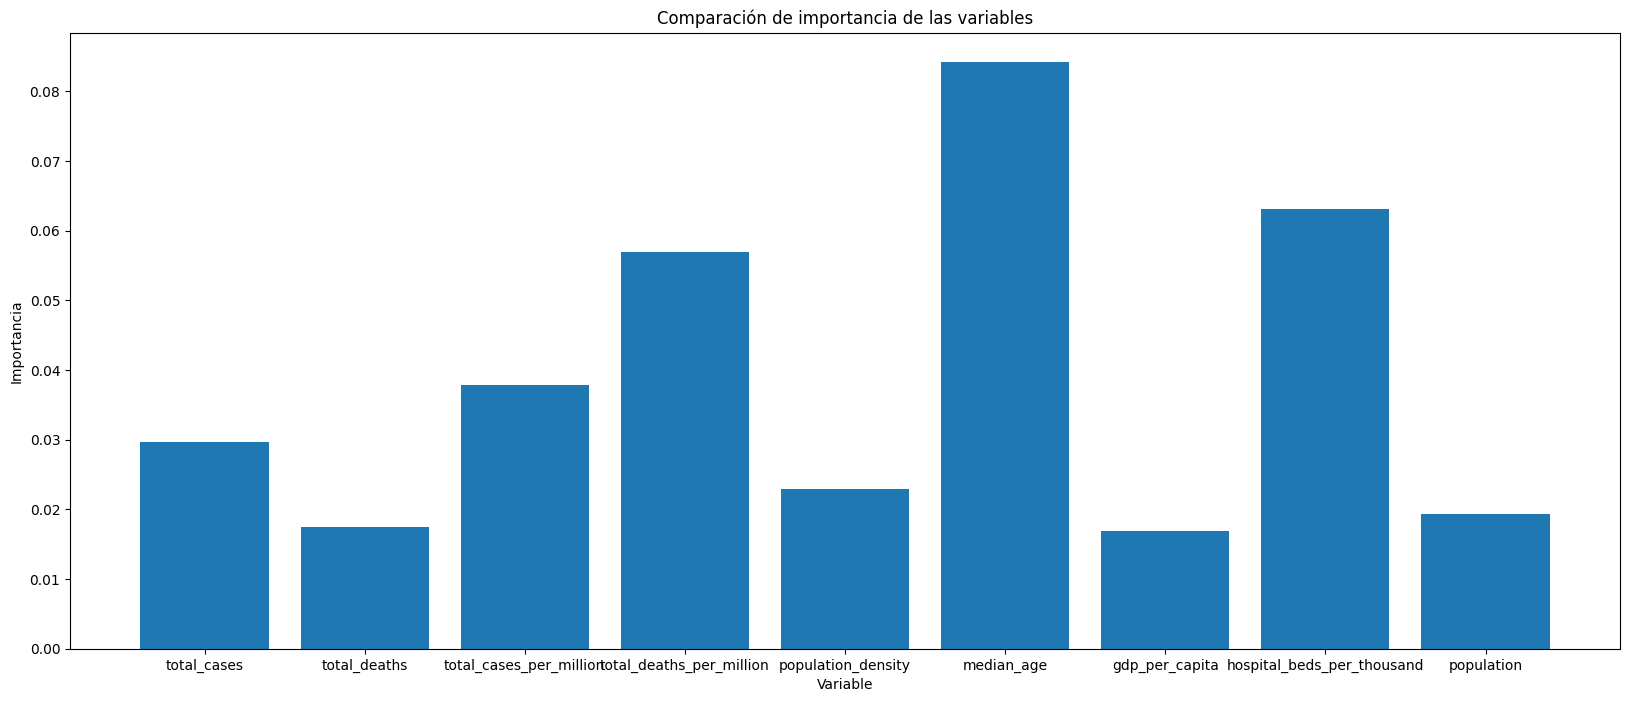

In [68]:
# Graficando las tablas
plt.figure(figsize=(20,8))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Comparación de importancia de las variables')
plt.show()